In [4]:
import osmnx as ox
import folium
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def get_coordinates(g: nx.Graph):
    x_pos = dict(g.nodes(data="x"))
    y_pos = dict(g.nodes(data="y"))
    pos = {key: (x_pos[key], y_pos[key]) for key in x_pos.keys()}
    return pos

In [6]:
# Extract and process the graph
munich_graph = ox.load_graphml("../data/munich_street_network.graphml")

# get coordinates
coors = get_coordinates(munich_graph)

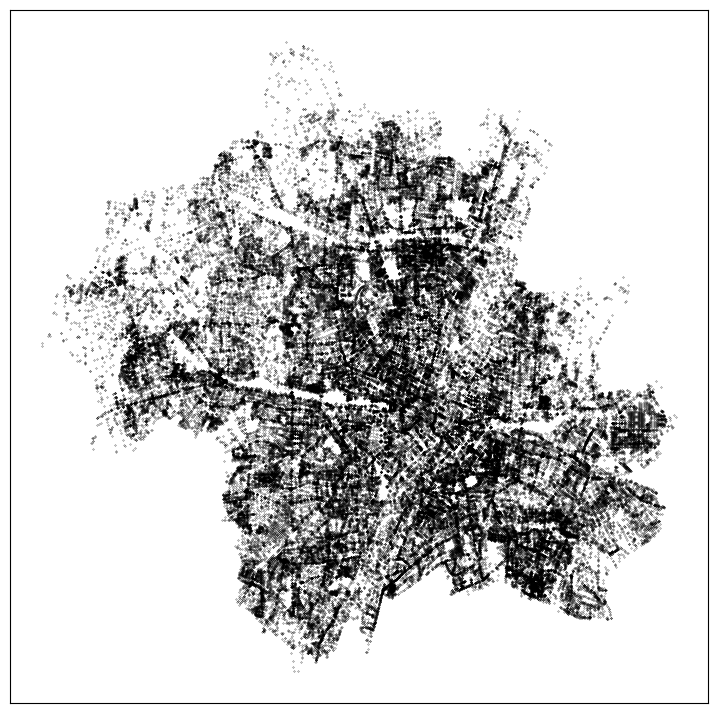

In [30]:
# Draw plain map (no accidents)
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
nx.draw_networkx_nodes(munich_graph, coors, node_size=0.05, node_color='k', ax=ax)
plt.show()

In [9]:
# import accidents
import pandas as pd

accident_data = pd.read_csv("../data/filtered_munich_accidents.csv", index_col=0, header=0)

accident_data

,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
OBJECTID,,,,,,,,,,,,,,,,,,,,,
95163,9220101008582061640,9,1,62,0,2022,1,12,7,3,...,0,1,0,0,0,0,693842.154441,5.331647e+06,11.604141,48.108560
95440,9220101008542000480,9,1,62,0,2022,1,9,7,3,...,0,1,0,0,0,0,688792.974622,5.339434e+06,11.539832,48.180074
95528,9220105008582010580,9,1,62,0,2022,1,12,4,2,...,0,1,0,0,0,0,693552.765631,5.331547e+06,11.600212,48.107752
95807,9220108008545029640,9,1,62,0,2022,1,14,7,3,...,0,1,0,0,0,0,677943.893723,5.335310e+06,11.392290,48.146132
95989,9220107008582006800,9,1,62,0,2022,1,13,6,3,...,0,1,0,0,0,0,694640.792260,5.334487e+06,11.616156,48.133848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229053,9221231008523567990,9,1,62,0,2022,12,18,7,3,...,0,1,0,0,0,1,692177.157061,5.331130e+06,11.581564,48.104424
229423,9221231008582588790,9,1,62,0,2022,12,12,7,3,...,1,0,0,0,0,0,690199.456967,5.335427e+06,11.556942,48.143640
229450,9221231008529577500,9,1,62,0,2022,12,14,7,3,...,0,1,0,1,0,0,688390.466532,5.328167e+06,11.529441,48.078922


In [46]:
accident_data = accident_data.loc[:, ["XGCSWGS84", "YGCSWGS84", "UKATEGORIE"]]

In [57]:
accident_low = accident_data[accident_data["UKATEGORIE"] == 3]
accident_med = accident_data[accident_data["UKATEGORIE"] == 2]
accident_high = accident_data[accident_data["UKATEGORIE"] == 1]

accident_low.to_csv("../data/accidents_low.csv")
accident_med.to_csv("../data/accidents_medium.csv")
accident_high.to_csv("../data/accidents_high.csv")

color_mapping = {1: "red",
                 2: "yellow",
                 3: "blue"
                 }

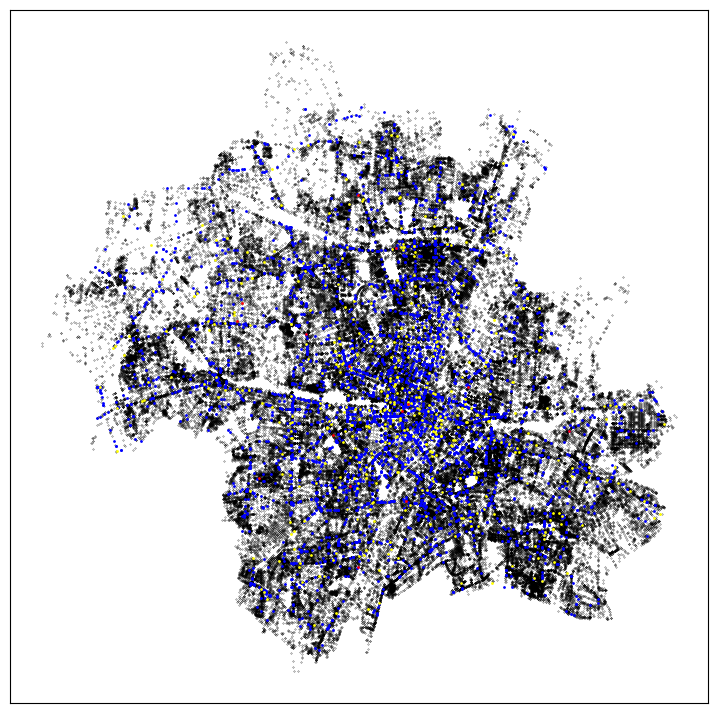

In [56]:
# draw accidents on map
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
nx.draw_networkx_nodes(munich_graph, coors, node_size=0.05, node_color='k', ax=ax)
ax.plot(accident_low.values[:, 0], accident_low.values[:, 1], 'o', markersize=1, c=color_mapping[3])
ax.plot(accident_med.values[:, 0], accident_med.values[:, 1], 'o', markersize=1, c=color_mapping[2])
ax.plot(accident_high.values[:, 0], accident_high.values[:, 1], 'o', markersize=1, c=color_mapping[1])
plt.show()